---------------------------
#### pdf values > 1
----------------------------

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Custom PDF functions
def pdf_1(x):
    return 2 * x

In [3]:
def plot_pdf(pdf):
    plt.figure(figsize=(6, 4))
    plt.plot(x, pdf(x))
    plt.scatter(random_points, pdf(random_points), color='red')
    plt.xlabel('x')
    plt.ylabel('PDF(x)')
    plt.grid(True)

In [4]:
# Plotting the PDFs for 3 random points
random_points = np.random.uniform(0, 1, size=3)

In [5]:
plot_pdf(pdf_1)

NameError: name 'x' is not defined

<Figure size 600x400 with 0 Axes>

In [46]:
def pdf_2(x):
    return np.sin(x)

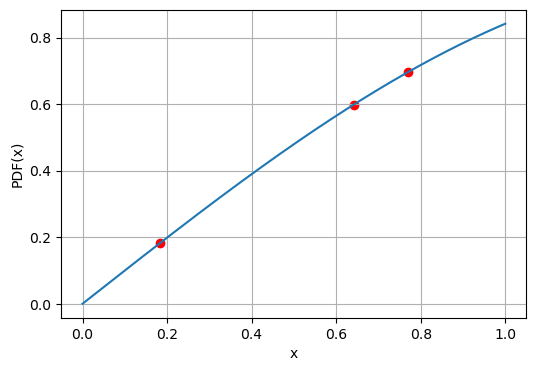

In [45]:
plot_pdf(pdf_2)

#### Exponential distribution

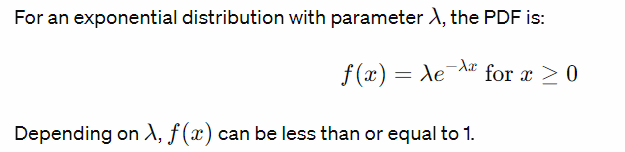

In [47]:
# Exponential Distribution PDF
def exponential_pdf(x, lmbda):
    return lmbda * np.exp(-lmbda * x)

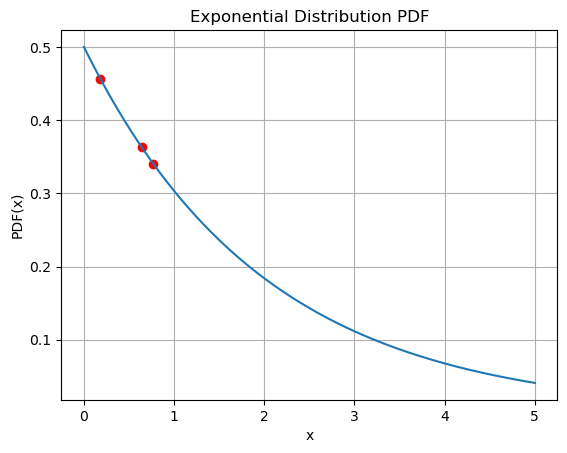

In [51]:
# Exponential Distribution
x_exp = np.linspace(0, 5, 1000)
lmbda = 0.5  # Parameter for the exponential distribution
plt.plot(x_exp, exponential_pdf(x_exp, lmbda), label='Exponential PDF')
plt.scatter(random_points, exponential_pdf(random_points, lmbda), color='red')
plt.title('Exponential Distribution PDF')
plt.xlabel('x')
plt.ylabel('PDF(x)')
plt.grid(True)


The maximum value of this PDF occurs when x=0, resulting in

f(0)=λ

Therefore, if 𝜆 is greater than 1, then the PDF will be greater than 1. 

For example, if 𝜆=2, f(0) = 2

#### normal distribution

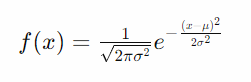

In [60]:
# Custom Normal Distribution PDF
def custom_normal_pdf(x, mean, std_dev):
    return 1 / (np.sqrt(2 * np.pi * std_dev**2)) * np.exp(-(x - mean)**2 / (2 * std_dev**2))

In [61]:
# Plotting the PDFs for 3 random points
random_points = np.random.uniform(5, 15, size=3)

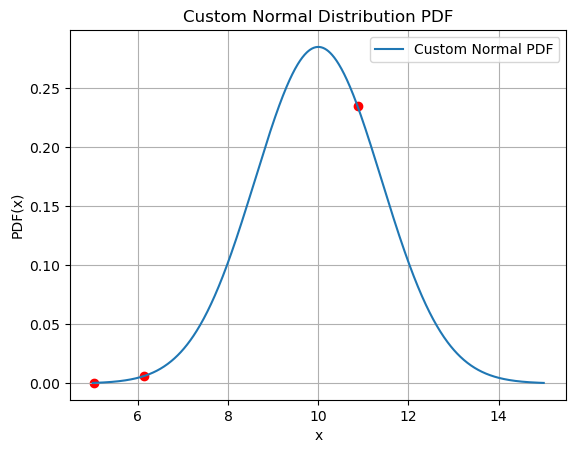

In [62]:
# Custom Normal Distribution
x_custom_norm = np.linspace(5, 15, 1000)
mean    = 10
std_dev = 1.4
plt.plot(x_custom_norm, custom_normal_pdf(x_custom_norm, mean, std_dev), label='Custom Normal PDF')
plt.scatter(random_points, custom_normal_pdf(random_points, mean, std_dev), color='red')
plt.title('Custom Normal Distribution PDF')
plt.xlabel('x')
plt.ylabel('PDF(x)')
plt.grid(True)
plt.legend();

In [63]:
# Parameters for the normal distribution
mean = 10
std_dev = 0.3  # Small standard deviation to show PDF > 1

In [64]:
# Range for x
x_values = np.linspace(8, 12, 1000)
pdf_values = custom_normal_pdf(x_values, mean, std_dev)

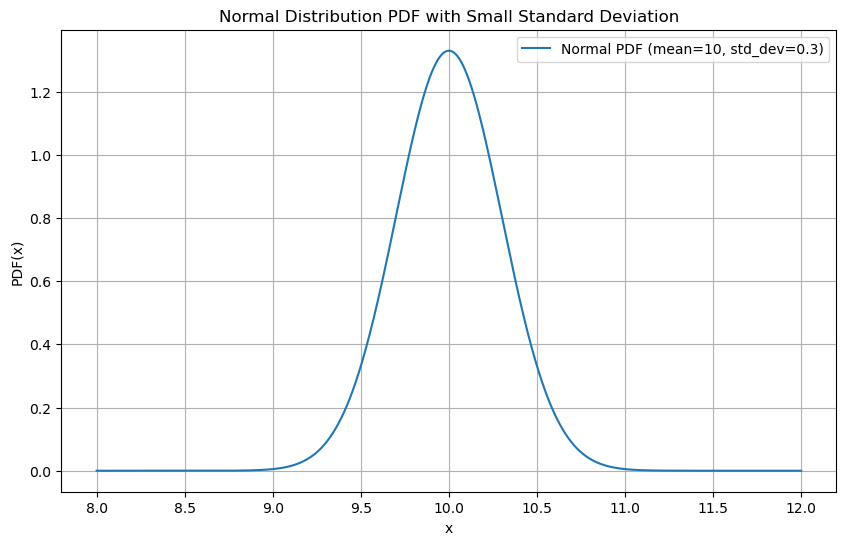

In [65]:
# Plot the custom normal PDF
plt.figure(figsize=(10, 6))
plt.plot(x_values, pdf_values, label=f'Normal PDF (mean={mean}, std_dev={std_dev})')
plt.title('Normal Distribution PDF with Small Standard Deviation')
plt.xlabel('x')
plt.ylabel('PDF(x)')
plt.grid(True)
plt.legend()
plt.show()


In [66]:
# Check maximum PDF value
max_pdf_value = custom_normal_pdf(mean, mean, std_dev)
print(f'Maximum PDF value at the mean (x={mean}): {max_pdf_value}')

Maximum PDF value at the mean (x=10): 1.3298076013381088


In [67]:
from ipywidgets import interact, FloatSlider
import seaborn as sns

In [70]:
# Function to update the plot based on slider value
def update_plot(std_dev):
    mean = 10
    x_values = np.linspace(5, 15, 1000)
    pdf_values = custom_normal_pdf(x_values, mean, std_dev)
    
    # Draw sample from the normal distribution
    sample = np.random.normal(mean, std_dev, size=1000)
    
    plt.figure(figsize=(6, 4))
    
    # Plot the custom normal PDF
    plt.plot(x_values, pdf_values, label=f'Normal PDF (mean={mean}, std_dev={std_dev:.2f})')
    plt.title('Normal Distribution PDF')
    plt.xlabel('x')
    plt.ylabel('PDF(x)')
    plt.grid(True)
    plt.legend()
       
    plt.tight_layout()
    plt.show()

In [71]:
# Create an interactive slider for the standard deviation
interact(update_plot, std_dev=FloatSlider(min=0.03, max=3, step=0.01, value=1));

interactive(children=(FloatSlider(value=1.0, description='std_dev', max=3.0, min=0.03, step=0.01), Output()), …

The maximum value of this PDF occurs at the mean 𝜇, where 𝑥=𝜇. At this point, the value of the PDF is:

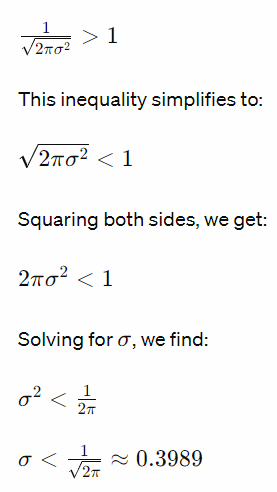

- The PDF can have values greater than 1, particularly when the standard deviation is small. This simply indicates a higher density of values near the mean.
- To find the probability that a random variable falls within a specific range [𝑎,𝑏], you integrate the PDF over [𝑎,𝑏]

#### let us have sample data 
- for mean = 10, std dev = 0.30

In [76]:
import pandas as pd

In [77]:
# Parameters
mean    = 10
std_dev = 0.30 

In [78]:
# Generate 500 random samples
samples = np.random.normal(mean, std_dev, 500)

In [79]:
# Display MIN and MAX values in the sample
min_value = np.min(samples)
max_value = np.max(samples)
print(f"MIN value in the sample: {min_value}")
print(f"MAX value in the sample: {max_value}")

MIN value in the sample: 9.207894324975504
MAX value in the sample: 10.986390682646164


In [80]:
# Create a DataFrame with data points and corresponding PDF values
data_points = samples
pdf_values  = custom_normal_pdf(data_points, mean, std_dev)

df = pd.DataFrame({'Data Point': data_points, 'PDF Value': pdf_values})

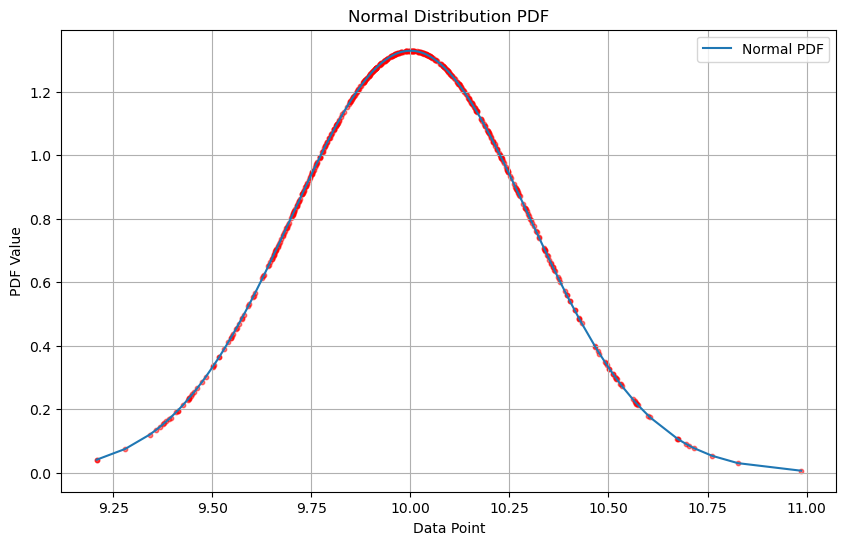

In [81]:
# Plot the PDF for all data points
plt.figure(figsize=(10, 6))
plt.plot(np.sort(data_points), custom_normal_pdf(np.sort(data_points), mean, std_dev), label='Normal PDF')
plt.scatter(data_points, pdf_values, color='red', s=10, alpha=0.5)
plt.title('Normal Distribution PDF')
plt.xlabel('Data Point')
plt.ylabel('PDF Value')
plt.grid(True)
plt.legend()
plt.show()

In [83]:
df.sort_values(['Data Point', 'PDF Value'])

,Data Point,PDF Value
493,9.207894,0.040734
477,9.208536,0.040964
494,9.280163,0.074746
197,9.341412,0.119478
276,9.357156,0.133883
...,...,...
376,10.703142,0.085291
190,10.716617,0.076692
53,10.761035,0.053259
141,10.826546,0.029885


#### Understanding PDF value

Given that for 𝑥=9.207894, the PDF value is 0.040734

**Density, Not Probability**: 

The value 0.040734 is not the probability. it represents the density of the probability at that specific point. In other words, it tells you how dense the probability mass is around 𝑥=9.207894.

**Probability in an Interval**: 

To get a meaningful probability from the PDF, you need to consider an interval around 𝑥=9.207894. The PDF value helps to understand how likely it is for the random variable to fall within a very small interval around 𝑥.

#### Interpretation of PDF Value
The PDF value 0.040734 means that if you were to take a very small interval around 𝑥=9.207894, the probability that the random variable falls within that interval is approximately 0.040734 times the width of the interval.

For example, if you consider a very small interval [9.207894−𝜖,9.207894+𝜖] for a tiny 𝜖:

𝑃(9.207894−𝜖≤𝑋≤9.207894+𝜖)≈0.040734×(2𝜖)

The smaller the interval, the more accurate this approximation becomes

In [85]:
x_value = 9.207894

In [86]:
# Calculate the PDF value for the specific x
pdf_value = custom_normal_pdf(x_value, mean, std_dev)

In [87]:
# Display the DataFrame
print(f"Data point: {x_value}, PDF value: {pdf_value}")


Data point: 9.207894, PDF value: 0.04073373780152832


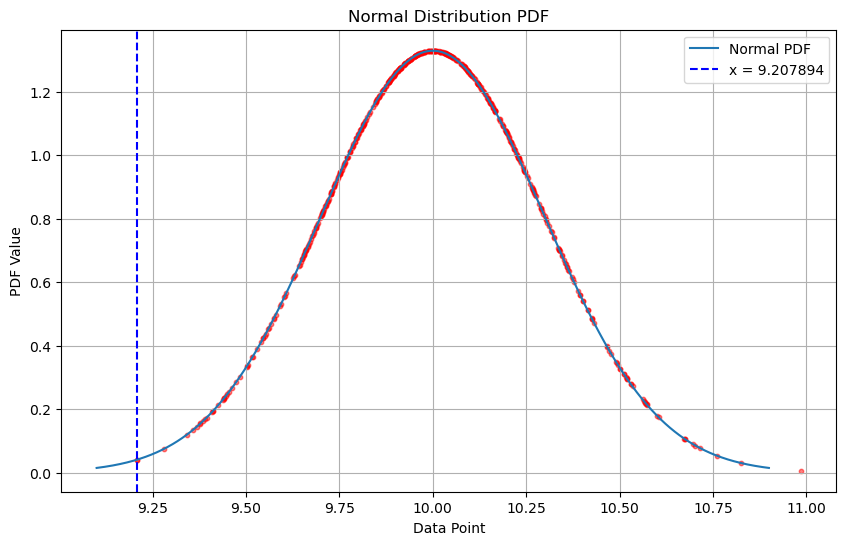

In [88]:
# Plot the PDF for all data points
plt.figure(figsize=(10, 6))
x_values = np.linspace(mean - 3*std_dev, mean + 3*std_dev, 1000)
plt.plot(x_values, custom_normal_pdf(x_values, mean, std_dev), label='Normal PDF')
plt.scatter(data_points, pdf_values, color='red', s=10, alpha=0.5)
plt.axvline(x=x_value, color='blue', linestyle='--', label=f'x = {x_value}')
plt.title('Normal Distribution PDF')
plt.xlabel('Data Point')
plt.ylabel('PDF Value')
plt.grid(True)
plt.legend()
plt.show()

In [90]:
from scipy.stats import norm

In [91]:
# Calculate the probability within a small interval around x_value
epsilon = 0.01

probability = norm.cdf(x_value + epsilon, mean, std_dev) - norm.cdf(x_value - epsilon, mean, std_dev)
print(f"Approximate probability within [{x_value - epsilon}, {x_value + epsilon}]: {probability}")

Approximate probability within [9.197894, 9.217894]: 0.0008155757272482011


#### Visualize

In [93]:
# Parameters
mean    = 10
std_dev = 0.30
x_value = 9.207894
epsilon = 0.01

In [94]:
# Generate 500 random samples
samples = np.random.normal(mean, std_dev, 500)

In [95]:
# Calculate the PDF value for the specific x
pdf_value = custom_normal_pdf(x_value, mean, std_dev)

In [96]:
# Display MIN and MAX values in the sample
min_value = np.min(samples)
max_value = np.max(samples)
print(f"MIN value in the sample: {min_value}")
print(f"MAX value in the sample: {max_value}")

MIN value in the sample: 9.233151690686064
MAX value in the sample: 10.977109413000264


In [104]:
# Create a DataFrame with data points and corresponding PDF values
data_points = samples
pdf_values = custom_normal_pdf(data_points, mean, std_dev)

In [105]:
# Plot the PDF and highlight the epsilon range
x_values = np.linspace(mean - 3*std_dev, mean + 3*std_dev, 1000)
pdf_values_plot = custom_normal_pdf(x_values, mean, std_dev)

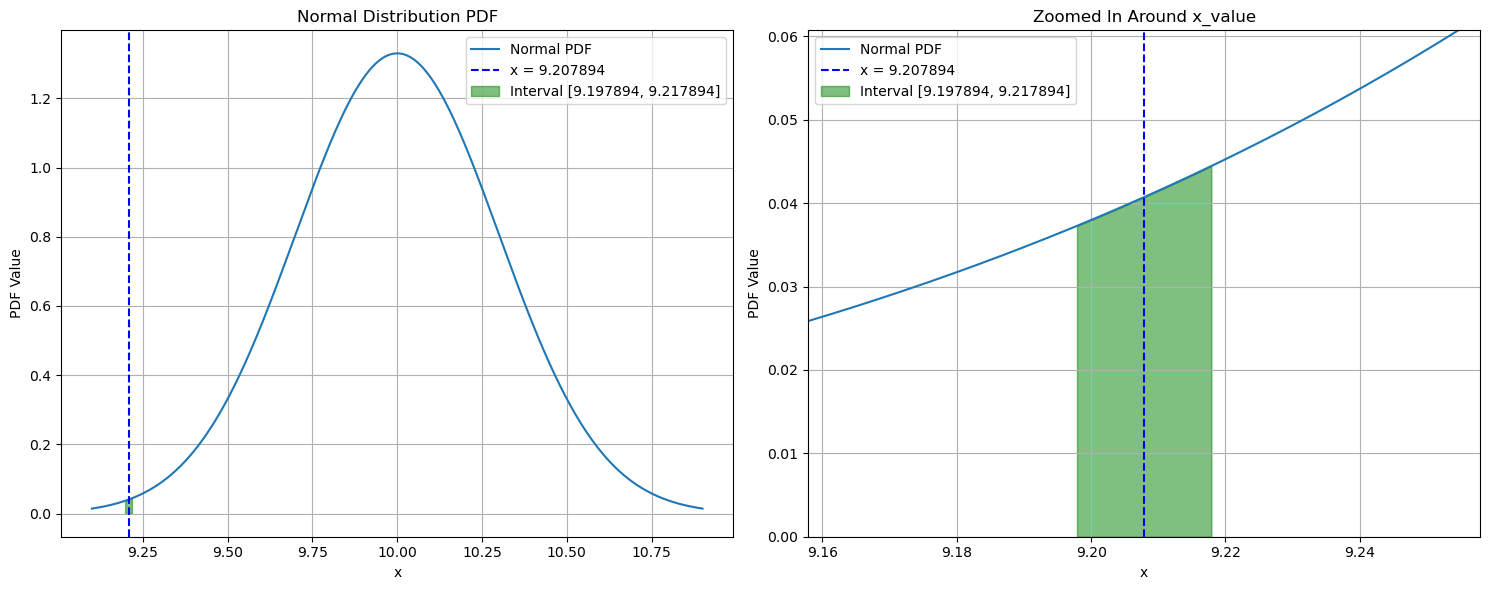

In [106]:
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Plot the full range of the normal distribution
axs[0].plot(x_values, pdf_values_plot, label='Normal PDF')
axs[0].axvline(x=x_value, color='blue', linestyle='--', label=f'x = {x_value}')
x_fill = np.linspace(x_value - epsilon, x_value + epsilon, 100)
y_fill = custom_normal_pdf(x_fill, mean, std_dev)
axs[0].fill_between(x_fill, y_fill, alpha=0.5, color='green', label=f'Interval [{x_value - epsilon}, {x_value + epsilon}]')
axs[0].set_title('Normal Distribution PDF')
axs[0].set_xlabel('x')
axs[0].set_ylabel('PDF Value')
axs[0].grid(True)
axs[0].legend()

# Zoom in around the x_value
axs[1].plot(x_values, pdf_values_plot, label='Normal PDF')
axs[1].axvline(x=x_value, color='blue', linestyle='--', label=f'x = {x_value}')
axs[1].fill_between(x_fill, y_fill, alpha=0.5, color='green', label=f'Interval [{x_value - epsilon}, {x_value + epsilon}]')
axs[1].set_xlim(x_value - 0.05, x_value + 0.05)
axs[1].set_ylim(0, custom_normal_pdf(x_value, mean, std_dev) + 0.02)
axs[1].set_title('Zoomed In Around x_value')
axs[1].set_xlabel('x')
axs[1].set_ylabel('PDF Value')
axs[1].grid(True)
axs[1].legend()

plt.tight_layout()
plt.show()

In [103]:
# Calculate the probability within the epsilon range
probability = norm.cdf(x_value + epsilon, mean, std_dev) - norm.cdf(x_value - epsilon, mean, std_dev)
print(f"Approximate probability within [{x_value - epsilon}, {x_value + epsilon}]: {probability}")

Approximate probability within [9.197894, 9.217894]: 0.0008155757272482011


#### Making it interactive
- slider on X_values

In [107]:
from ipywidgets import interact, FloatSlider
import ipywidgets as widgets

In [118]:
# Plotting function
def plot_normal_distribution(x_value):
    fig, axs = plt.subplots(1, 2, figsize=(15, 6))
    
    # Plot the full range of the normal distribution
    x_values = np.linspace(mean - 3*std_dev, mean + 3*std_dev, 1000)
    pdf_values_plot = custom_normal_pdf(x_values, mean, std_dev)
    
    axs[0].plot(x_values, pdf_values_plot, label='Normal PDF')
    axs[0].axvline(x=x_value, color='blue', linestyle='--', label=f'x = {x_value}')
    x_fill = np.linspace(x_value - epsilon, x_value + epsilon, 100)
    y_fill = custom_normal_pdf(x_fill, mean, std_dev)
    axs[0].fill_between(x_fill, y_fill, alpha=0.5, color='green', label=f'Interval [{x_value - epsilon}, {x_value + epsilon}]')
    
    # Adding 1, 2, 3 sigma lines
    for sigma in range(1, 4):
        axs[0].axvline(mean + sigma*std_dev, color='red', linestyle='--', linewidth=1)
        axs[0].axvline(mean - sigma*std_dev, color='red', linestyle='--', linewidth=1)
    
    axs[0].set_title('Normal Distribution PDF')
    axs[0].set_xlabel('x')
    axs[0].set_ylabel('PDF Value')
    axs[0].grid(True)
    axs[0].legend()
    
    # Zoom in around the x_value
    axs[1].plot(x_values, pdf_values_plot, label='Normal PDF')
    axs[1].axvline(x=x_value, color='blue', linestyle='--', label=f'x = {x_value}')
    axs[1].fill_between(x_fill, y_fill, alpha=0.5, color='green', label=f'Interval [{x_value - epsilon}, {x_value + epsilon}]')
    axs[1].set_xlim(x_value - 0.05, x_value + 0.05)
    axs[1].set_ylim(0, custom_normal_pdf(x_value, mean, std_dev) + 0.02)
    axs[1].set_title('Zoomed In Around x_value')
    axs[1].set_xlabel('x')
    axs[1].set_ylabel('PDF Value')
    axs[1].grid(True)
    axs[1].legend()
    
    plt.tight_layout()
    plt.show()
    
    # Calculate the probability within the epsilon range
    probability = norm.cdf(x_value + epsilon, mean, std_dev) - norm.cdf(x_value - epsilon, mean, std_dev)
    print(f"Approximate probability within [{x_value - epsilon}, {x_value + epsilon}]: {probability}")

In [119]:
# Interactive plot
interact(
    plot_normal_distribution,
    x_value=FloatSlider(value=min_value, min=min_value, max=max_value, step=0.001, description='x_value')
)

interactive(children=(FloatSlider(value=9.233151690686064, description='x_value', max=10.977109413000264, min=…

<function __main__.plot_normal_distribution(x_value)>

In [120]:
x_value = 9.99

In [121]:
probability = norm.cdf(x_value + epsilon, mean, std_dev) - norm.cdf(x_value - epsilon, mean, std_dev)
print(f"Approximate probability within [{x_value - epsilon}, {x_value + epsilon}]: {probability}")

Approximate probability within [9.98, 10.0]: 0.026576464300364533


#### visualize the probabilities

In [130]:
# Generate x_values
x_values = np.linspace(mean - 3*std_dev, mean + 3*std_dev, 50)

In [131]:
# Calculate probabilities for each x_value
probabilities = []
for x in x_values:
    prob = norm.cdf(x + epsilon, mean, std_dev) - norm.cdf(x - epsilon, mean, std_dev)
    probabilities.append(prob)

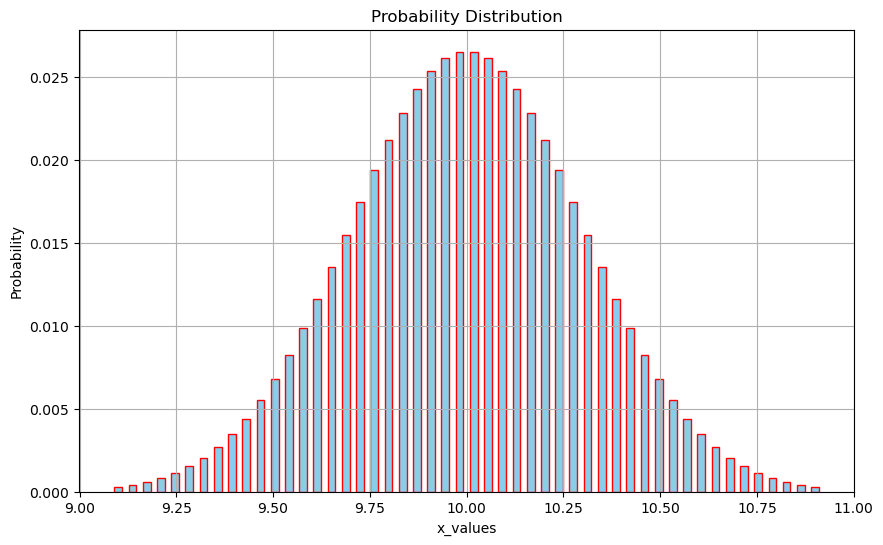

In [132]:
# Plot computed probabilities
plt.figure(figsize=(10, 6))
plt.bar(x_values, probabilities, width=0.02, color='skyblue', edgecolor='red')
plt.xlabel('x_values')
plt.ylabel('Probability')
plt.title('Probability Distribution')
plt.grid(True)
plt.show()

In [133]:
# Create DataFrame
df = pd.DataFrame({'x_values': x_values, 'probabilities': probabilities})
df

,x_values,probabilities
0,9.100000,0.000296
1,9.136735,0.000424
2,9.173469,0.000599
3,9.210204,0.000832
4,9.246939,0.001140
5,9.283673,0.001539
6,9.320408,0.002046
7,9.357143,0.002679
8,9.393878,0.003457
9,9.430612,0.004393


#### Probability Density Function (PDF):
**Relative Measure**: The PDF at a specific point represents the relative likelihood of the random variable taking that value. It provides a measure of how densely the values are distributed around a given point.

**Not Directly Probabilities**: PDF values themselves are not probabilities but rather indicate the density of the distribution. Higher PDF values indicate higher density or likelihood of observing values around that point.

#### Probabilities:

**Relative Measures**: Probabilities represent the likelihood of the random variable falling within a specific range or interval.

**Normalized Values**: Probabilities are normalized measures, with the total probability over the entire sample space being equal to 1.

**Derived from PDF**: In continuous distributions, probabilities are derived by integrating the PDF over a given interval. This integration provides the cumulative probability of the variable falling within that interval.